In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# knn imputation transform for the horse colic dataset
from numpy import isnan
from pandas import read_csv
from sklearn.impute import KNNImputer

import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [86]:
cleveland_file = "./processed.clevelandd.data"
cleveland_df = pd.read_csv(cleveland_file, header=None, na_values='?')
cleveland_df.columns = ["age", "sex", "cp", "trestbps","chol", "fbs", "restecg","thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"]
cleveland_df
cleveland_df = cleveland_df.replace('?', np.nan)
cleveland_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [87]:
cleveland_nan = pd.DataFrame(cleveland_df.isnull().sum())
cleveland_nan

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [93]:
# split into input and output elements
data = cleveland_df.values
ix = [i for i in range(data.shape[1]) if i != 13]
X, y = data[:, ix], data[:, 13]
# print total missing
print('Missing: %d' % sum(isnan(X).flatten()))
# define imputer
imputer = KNNImputer()
# fit on the dataset
imputer.fit(X)
# transform the dataset
Xtrans = imputer.transform(X)
# print total missing
print('Missing: %d' % sum(isnan(Xtrans).flatten()))


Missing: 6
Missing: 0


In [113]:
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

# define modeling pipeline
model = RandomForestClassifier()
imputer = KNNImputer()
pipeline = Pipeline(steps=[('i', imputer), ('m', model)])

In [100]:
ix = [i for i in range(data.shape[1]) if i != 13]
X, y = data[:, ix], data[:, 13]
# define modeling pipeline
model = RandomForestClassifier()
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
pipeline = Pipeline(steps=[('i', imputer), ('m', model)])
# define model evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.580 (0.040)


In [101]:
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
imputer.fit(X)
Xtrans = imputer.transform(X)

In [106]:
from decimal import Decimal

# split into input and output elements
data = cleveland_df.values

# print total missing
print('Missing: %d' % sum(isnan(X).flatten()))
# define imputer
imputer = KNNImputer()
# fit on the dataset
imputer.fit(X)
# transform the dataset
Xtrans = imputer.transform(X)
# print total missing
print('Missing: %d' % sum(isnan(Xtrans).flatten()))


Missing: 6
Missing: 0


>1 0.574 (0.049)
>3 0.579 (0.044)
>5 0.564 (0.042)
>7 0.575 (0.052)
>9 0.574 (0.041)
>15 0.582 (0.045)
>18 0.572 (0.039)
>21 0.575 (0.038)


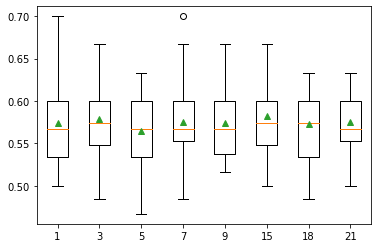

In [109]:
results = list()
strategies = [str(i) for i in [1,3,5,7,9,15,18,21]]
for s in strategies:
	# create the modeling pipeline
	pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=int(s))), ('m', RandomForestClassifier())])
	# evaluate the model
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	# store results
	results.append(scores)
	print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=strategies, showmeans=True)
plt.show()

In [122]:
def optimize_knn_imputer(data, target):
    results = list()
    for s in range(1, 50, 2):
        imputer = KNNImputer(n_neighbors=s, weights='distance', metric='nan_euclidean')
        array = data.values
        X = array [:,:-1]
        Y = data[target]
        
        lb = preprocessing.LabelBinarizer()
        Y_binary = np.array([number[0] for number in lb.fit_transform(Y)])

        trans = MinMaxScaler()
        trans_X = trans.fit_transform(X)
        
        X_imputed = imputer.fit_transform(trans_X)
        X_imputed_df = pd.DataFrame(X_imputed, columns=data.drop(target, axis=1).columns)
        
        model = RandomForestClassifier()
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
        scores = cross_val_score(model, X_imputed, Y_binary, scoring='accuracy', cv=cv, n_jobs=-1)       
        results.append(scores)
        print('>K : %s --> Mean : %.3f --> Std : (%.3f)' % (s, mean(scores), std(scores)))              
    plt.boxplot(results, labels=range(1, 50, 2), showmeans=True)
    plt.show()

In [126]:
import os
import warnings

warnings.filterwarnings('ignore')
def optimize_knn_imputerr(data, target):
    results = list()
    for s in range(1, 50, 2):
        imputer = KNNImputer(n_neighbors=s, weights='distance', metric='nan_euclidean')
        array = data.values
        X = array [:,:-1]
        Y = data[target]
        
        data['num'][data.num >0] = 1
        Y_temp = data['num']


        trans = MinMaxScaler()
        trans_X = trans.fit_transform(X)
        
        X_imputed = imputer.fit_transform(trans_X)
        X_imputed_df = pd.DataFrame(X_imputed, columns=data.drop(target, axis=1).columns)
        
        model = RandomForestClassifier()
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
        scores = cross_val_score(model, X_imputed, Y_temp, scoring='accuracy', cv=cv, n_jobs=-1)       
        results.append(scores)
        print('>K : %s --> Mean : %.3f --> Std : (%.3f)' % (s, mean(scores), std(scores)))              
    plt.boxplot(results, labels=range(1, 50, 2), showmeans=True)
    plt.show()

>K : 1 --> Mean : 0.815 --> Std : (0.063)
>K : 3 --> Mean : 0.818 --> Std : (0.054)
>K : 5 --> Mean : 0.824 --> Std : (0.056)
>K : 7 --> Mean : 0.825 --> Std : (0.051)
>K : 9 --> Mean : 0.825 --> Std : (0.051)
>K : 11 --> Mean : 0.831 --> Std : (0.049)
>K : 13 --> Mean : 0.823 --> Std : (0.051)
>K : 15 --> Mean : 0.821 --> Std : (0.054)
>K : 17 --> Mean : 0.827 --> Std : (0.050)
>K : 19 --> Mean : 0.820 --> Std : (0.052)
>K : 21 --> Mean : 0.826 --> Std : (0.054)
>K : 23 --> Mean : 0.818 --> Std : (0.053)
>K : 25 --> Mean : 0.815 --> Std : (0.061)
>K : 27 --> Mean : 0.823 --> Std : (0.055)
>K : 29 --> Mean : 0.833 --> Std : (0.053)
>K : 31 --> Mean : 0.821 --> Std : (0.058)
>K : 33 --> Mean : 0.827 --> Std : (0.055)
>K : 35 --> Mean : 0.821 --> Std : (0.054)
>K : 37 --> Mean : 0.818 --> Std : (0.058)
>K : 39 --> Mean : 0.821 --> Std : (0.050)
>K : 41 --> Mean : 0.820 --> Std : (0.057)
>K : 43 --> Mean : 0.828 --> Std : (0.053)
>K : 45 --> Mean : 0.826 --> Std : (0.049)
>K : 47 --> Mean

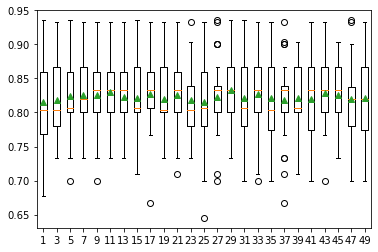

In [127]:
optimize_knn_imputer(cleveland_df, 'num')

>K : 1 --> Mean : 0.823 --> Std : (0.052)
>K : 3 --> Mean : 0.821 --> Std : (0.062)
>K : 5 --> Mean : 0.820 --> Std : (0.059)
>K : 7 --> Mean : 0.813 --> Std : (0.059)
>K : 9 --> Mean : 0.825 --> Std : (0.053)
>K : 11 --> Mean : 0.823 --> Std : (0.052)
>K : 13 --> Mean : 0.822 --> Std : (0.058)
>K : 15 --> Mean : 0.820 --> Std : (0.060)
>K : 17 --> Mean : 0.825 --> Std : (0.053)
>K : 19 --> Mean : 0.825 --> Std : (0.048)
>K : 21 --> Mean : 0.823 --> Std : (0.060)
>K : 23 --> Mean : 0.825 --> Std : (0.056)
>K : 25 --> Mean : 0.824 --> Std : (0.051)
>K : 27 --> Mean : 0.827 --> Std : (0.050)
>K : 29 --> Mean : 0.825 --> Std : (0.052)
>K : 31 --> Mean : 0.823 --> Std : (0.057)
>K : 33 --> Mean : 0.824 --> Std : (0.053)
>K : 35 --> Mean : 0.822 --> Std : (0.054)
>K : 37 --> Mean : 0.825 --> Std : (0.054)
>K : 39 --> Mean : 0.823 --> Std : (0.051)
>K : 41 --> Mean : 0.827 --> Std : (0.058)
>K : 43 --> Mean : 0.822 --> Std : (0.060)
>K : 45 --> Mean : 0.822 --> Std : (0.054)
>K : 47 --> Mean

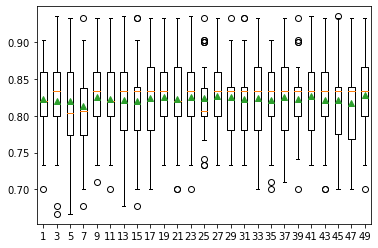

In [128]:
optimize_knn_imputerr(cleveland_df, 'num')